In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import random
import numpy as np
from copy import deepcopy
from collections import defaultdict
from scipy.interpolate import make_interp_spline, BSpline


In [168]:
simJobRes = {
    "fifo" : "",
    "sjf" : "",
    "shortest" : "",
    "dlas-gpu" : "/home/anurag/Courses/Spring2022/BDML/project/finalR/res_dlas_gpu_all_gpu_data",
    "dlas-gpu-gittins" : "/home/anurag/Courses/Spring2022/BDML/project/finalR/res_gittins_all_gpu_data",
    "gandiva" : "/home/anurag/Courses/Spring2022/BDML/project/finalR/res_gandiva_all_gpu_data",
    "all_gandiva": "/home/anurag/Courses/Spring2022/BDML/project/finalR/results1/results_gandiva_sampled",
    "all_dlas-gpu": "/home/anurag/Courses/Spring2022/BDML/project/finalR/results_dlas_gpu_sampled",
    "all_dlas-gpu-gittins": "/home/anurag/Courses/Spring2022/BDML/project/finalR/results_dlas_gpu_gittins_sampled"
}

In [169]:
dataSet = {}
dataSet_jobs = {}

for k in simJobRes:
    if simJobRes[k] != "":
        temp = []
        with open(simJobRes[k]+"/cluster.csv", newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for r in reader:
                temp.append(r)
        dataSet[k] = temp

        temp = []
        with open(simJobRes[k]+"/job.csv", newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for r in reader:
                temp.append(r)
        dataSet_jobs[k] = temp


print(dataSet.keys())
print(dataSet['dlas-gpu'][0])
print(dataSet_jobs.keys())
print(dataSet_jobs['dlas-gpu'][0])


dict_keys(['dlas-gpu', 'dlas-gpu-gittins', 'gandiva', 'all_gandiva', 'all_dlas-gpu', 'all_dlas-gpu-gittins'])
{'time': '0', 'idle_node': '256', 'busy_node': '0', 'full_node': '0', 'idle_gpu': '2047', 'busy_gpu': '1', 'pending_job': '0', 'running_job': '1', 'completed_job': '0'}
dict_keys(['dlas-gpu', 'dlas-gpu-gittins', 'gandiva', 'all_gandiva', 'all_dlas-gpu', 'all_dlas-gpu-gittins'])
{'time': '7453', 'job_id': 'application_1504131676014_5067', 'num_gpu': '1', 'submit_time': '80', 'start_time': '80', 'end_time': '7453', 'executed_time': '7373', 'JCT': '7373', 'duration': '7373', 'pending_time': '0', 'preempt': '0', 'promote': '0'}


dlas-gpu 0.7133698125484997
dlas-gpu-gittins 0.7060454053840887
gandiva 0.38461299959083783
all_gandiva 0.03951454311304994
all_dlas-gpu 0.8836760519701965
all_dlas-gpu-gittins 0.8789157927386565


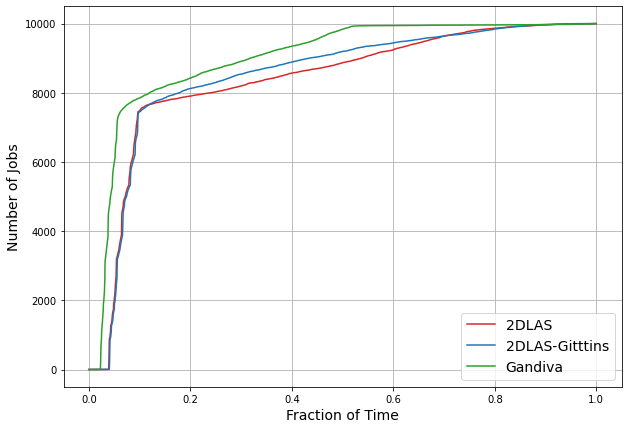

In [170]:
gpuUtil = {}
jobC = {}
jobJCT = {}
jobDuration = {}
jobDurJCT = {}

for k in dataSet:
    jobJCT[k] = [[], []]
    jobDuration[k] = [[],[]]
    jobDurJCT[k] = [[], []]
    i = 0
    for l in dataSet_jobs[k]:
        jobJCT[k][0].append(i)
        jobJCT[k][1].append(int(l['JCT']))

        jobDuration[k][0].append(i)
        jobDuration[k][1].append(int(l['duration']))

        jobDurJCT[k][0].append(i)
        jobDurJCT[k][1].append(int(l['JCT'])-int(l['duration']))

        i+=1

for k in dataSet:
    maxT = 0
    for l in dataSet[k]:
        maxT = max(maxT, int(l['time']))
    jobC[k] = [[], []]
    for l in dataSet[k]:
        jobC[k][0].append(float(l['time'])/maxT)
        jobC[k][1].append(int(l['completed_job']))

for k in dataSet:
    temp = []
    maxT = 0
    for l in dataSet[k]:
        temp.append([int(l['time']), float(l['busy_gpu'])/float(2048)])
        maxT = max(maxT, int(l['time']))
    gpuUtil[k] = [[],[]]
    temp_1 = defaultdict(int)
    for i in range(len(temp)-1):
        temp_1[temp[i][1]*100] += temp[i+1][0] - temp[i][0]
    for t in temp_1:
        temp_1[t] = temp_1[t] / maxT
    #
    # for t in temp_1:
    #     gpuUtil[k][0].append(t)
    #     gpuUtil[k][1].append(temp_1[t])
    for t in temp:
        gpuUtil[k][0].append(t[0])
        gpuUtil[k][1].append(t[1])
    print(k, sum(gpuUtil[k][1])/len(gpuUtil[k][1]))

# for k in gpuUtil:
#     # print(len(gpuUtil[k][0]))
#     # plt.plot(gpuUtil[k][0], gpuUtil[k][1])
#     # plt.legend(k)
#     print(k)
#
#     # plt.figure(figsize=(12, 10))
#     # #
#     # xnew = np.linspace(min(gpuUtil[k][0]), max(gpuUtil[k][0]), 500)
#     # spl = make_interp_spline(gpuUtil[k][0], gpuUtil[k][1], k=3)
#     # y_smooth = spl(xnew)
#     # #
#     # # plt.plot(xnew, y_smooth)
#     # #
#     # # plt.plot(jobC[k][0], jobC[k][1])
#     #
#     # fig, ax1 = plt.subplots()
#     # ax1.plot(xnew, y_smooth, color='tab:red')
#     #
#     # ax2 = ax1.twinx()
#     # ax2.plot(jobC[k][0], jobC[k][1], color='tab:blue')
#     # fig.tight_layout()  # otherwise the right y-label is slightly clipped
#     # plt.show()
#
#     # plt.figure(figsize=(12, 10))
#     #
#     # plt.plot(jobDurJCT[k][0], jobDurJCT[k][1], color='tab:blue')
#     # plt.show()
#     #
#
#     plt.figure(figsize=(12, 10))
#     plt.plot(jobC[k][0], jobC[k][1], color='tab:red')
#     plt.show()

# "dlas-gpu" : "/home/anurag/Courses/Spring2022/BDML/project/finalR/res_dlas_gpu_all_gpu_data",
# "dlas-gpu-gittins" : "/home/anurag/Courses/Spring2022/BDML/project/finalR/res_gittins_all_gpu_data",
# "gandiva" : "/home/anurag/Courses/Spring2022/BDML/project/finalR/res_gandiva_all_gpu_data",


# fig, ax1 = plt.subplots(figsize=(12, 10))
# l1 = ax1.plot(jobC['dlas-gpu'][0], jobC['dlas-gpu'][1], color='tab:red', label="2DLAS")
# l2 = ax1.plot(jobC['dlas-gpu-gittins'][0], jobC['dlas-gpu-gittins'][1], color='tab:blue', label="2DLAS-Gitttins")
#
# ax2 = ax1.twiny()
# l3 = ax2.plot(jobC["gandiva"][0], jobC["gandiva"][1], color='tab:green', label="Gandiva")
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# # ax1.legend(loc="lower right")
# # ax2.legend(loc="lower center")
# fig.legend(["2DLAS", "2DLAS-Gitttins", "Gandiva"], bbox_to_anchor=(0.98, 0.13))
#
# fig.ylabel("fraction of jobs")
# fig.xlabel("GPU Util (s)")
# plt.show()

plt.figure(figsize=(10,7))
plt.plot(jobC['dlas-gpu'][0], jobC['dlas-gpu'][1], color='tab:red', label="2DLAS")
plt.plot(jobC['dlas-gpu-gittins'][0], jobC['dlas-gpu-gittins'][1], color='tab:blue', label="2DLAS-Gitttins")

# ax2 = ax1.twiny()
plt.plot(jobC["gandiva"][0], jobC["gandiva"][1], color='tab:green', label="Gandiva")
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# ax1.legend(loc="lower right")
# ax2.legend(loc="lower center")
plt.legend(["2DLAS", "2DLAS-Gitttins", "Gandiva"], fontsize=14)
plt.grid(True)
plt.ylabel("Number of Jobs", fontsize=14)
plt.xlabel("Fraction of Time", fontsize=14)
plt.show()